In [2]:
import sys
import numpy as np
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline

from IPython.display import Image
from scipy import optimize

from tyssue import config, Sheet, SheetGeometry, History, EventManager
from tyssue import SheetGeometry as geom
from tyssue import PlanarGeometry as geom
from tyssue.draw.plt_draw import create_gif
from tyssue.draw.plt_draw import plot_forces
from tyssue.draw import sheet_view
from tyssue.dynamics import effectors, model_factory
from tyssue.dynamics import PlanarModel
from tyssue.dynamics import SheetModel as model
from tyssue.generation import three_faces_sheet
from tyssue.solvers.viscous import EulerSolver
from tyssue.solvers.quasistatic import QSSolver
from tyssue.draw import sheet_view
from tyssue.draw.plt_draw import plot_forces
from tyssue.io import hdf5


geom  = SheetGeometry
model = PlanarModel

C++ extension are not available for this version
collision solver could not be imported You may need to install CGAL and re-install tyssue


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
cellmap = Sheet.planar_sheet_3d('cellmap', 7, 7, 1, 1)

cellmap.sanitize ( trim_borders=True, order_edges=True )

geom.update_all(cellmap)

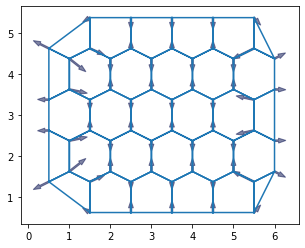

In [6]:
cellmap.update_specs(config.dynamics.quasistatic_plane_spec())

history = History(cellmap, extra_cols={"edge":["dx", "dy"]})

cellmap.face_df["face_elasticity"] = 6
cellmap.face_df["prefered_area"] = 1  #cellmap.face_df["area"].mean()

cellmap.vert_df['viscosity'] = 1
cellmap.edge_df['line_tension'] *= 0.5

fig, ax = plot_forces(cellmap, geom, model, ['x', 'y'], 1)

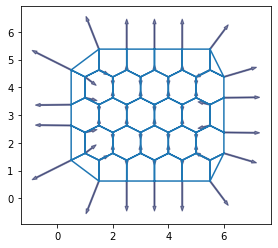

In [5]:
#Te

cellmap.update_specs(config.dynamics.quasistatic_plane_spec())

history = History(cellmap, extra_cols={"edge":["dx", "dy"]})

cellmap.face_df["face_elasticity"] = 5
cellmap.face_df["prefered_area"] = 2    #cellmap.face_df["area"].mean()

cellmap.vert_df['viscosity'] = 2
cellmap.edge_df['line_tension'] *= 0.0005



fig, ax = plot_forces(cellmap, geom, model, ['x', 'y'], 1)

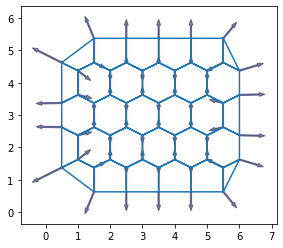

In [7]:
#Tc

cellmap.update_specs(config.dynamics.quasistatic_plane_spec())

history = History(cellmap, extra_cols={"edge":["dx", "dy"]})

cellmap.face_df["face_elasticity"] = 5
cellmap.face_df["prefered_area"] = 1.5           #cellmap.face_df["area"].mean()

cellmap.vert_df['viscosity'] = 2
cellmap.edge_df['line_tension'] *= 3.4



fig, ax = plot_forces(cellmap, geom, model, ['x', 'y'], 1)



In [ ]:
solver = EulerSolver(
    cellmap,
    geom,
    model,
    history=history,
    auto_reconnect=True)

In [ ]:
#create_frames(solver.history, '.', 10, [0, 10])

In [ ]:
#history_by_face_df = history.datasets['face']
#face_time = history_by_face_df['time']
#face_time

In [ ]:
#history_by_vert_df = history.datasets['vert']
#vert_time = history_by_vert_df['time']
#vert_time

In [ ]:
#history_by_edge_df = history.datasets['edge']
#edge_time = history_by_edge_df['time']
#edge_time

In [ ]:
res2 = res1.solve(tf=5, dt=0.05, on_topo_change=on_topo_change,
                   topo_change_args=(solver.eptm,))